## Prophet

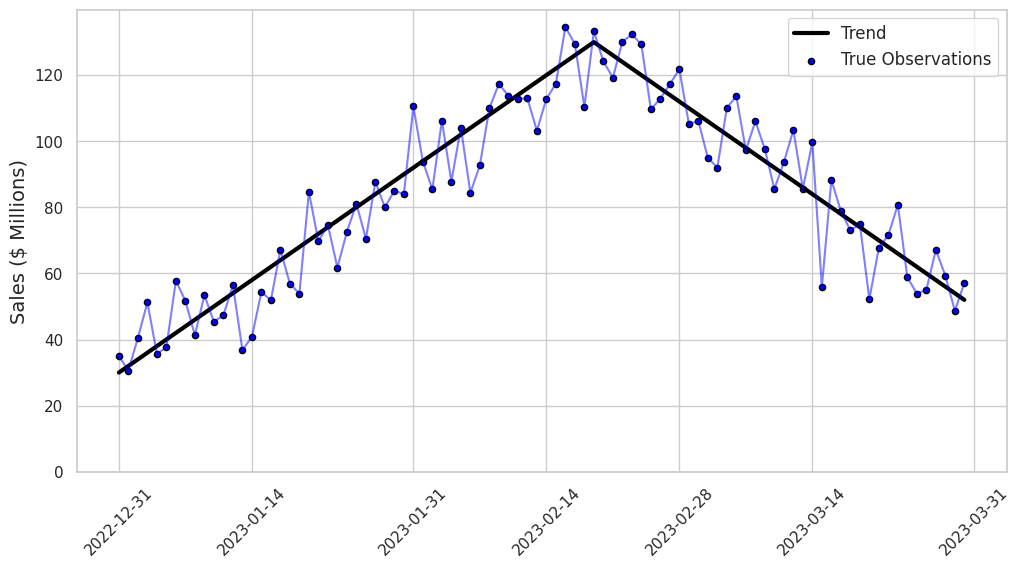

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


def generate_triangle_trend_with_noise(n=90, t_peak=50, noise_scale=10, start_date="2023-01-01"):
    np.random.seed(42)
    dates = pd.date_range(start=start_date, periods=n) 
    
    trend = np.piecewise(
        np.arange(n),
        [np.arange(n) < t_peak, np.arange(n) >= t_peak],
        [lambda t: 2 * t,  
         lambda t: 200 - 2 * t]  
    )
    
    noise = np.random.normal(loc=0, scale=noise_scale, size=n)  
    noisy_series = trend + noise + 30 

    return dates, trend, noisy_series


dates, trend, noisy_series = generate_triangle_trend_with_noise()


plt.figure(figsize=(12, 6))


plt.plot(dates, trend + 30, color='black', linewidth=3, label="Trend")

plt.scatter(dates, noisy_series, color='blue', edgecolors='black', label="True Observations", s=20)
plt.plot(dates, noisy_series, color='blue', alpha=0.5, linewidth=1.5)


plt.ylabel("Sales ($ Millions)", fontsize=14)
plt.ylim(bottom=0)
plt.xticks(rotation=45)  
plt.legend(fontsize=12)
plt.show()


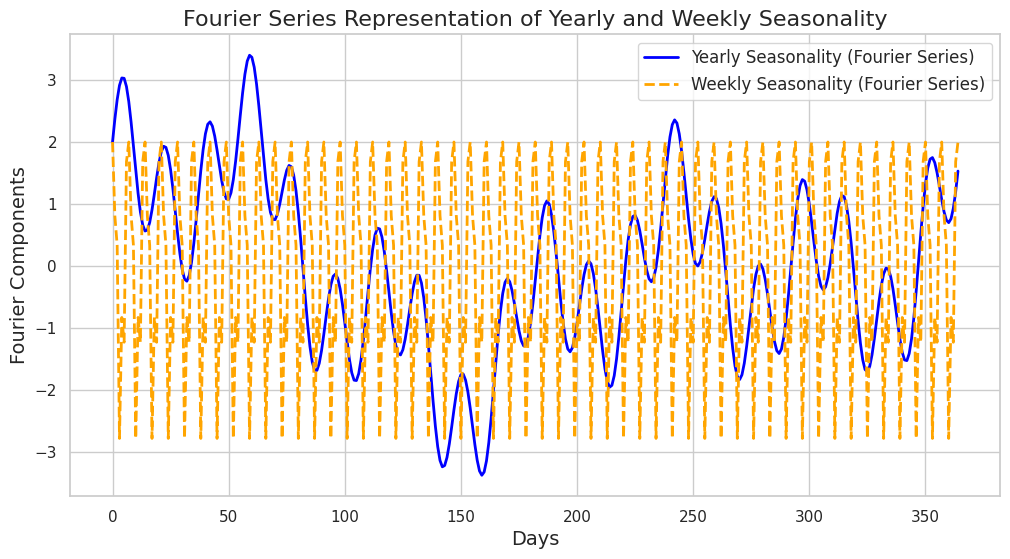

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

days = np.arange(0, 365, 1)  
omega = 2 * np.pi / 365.25  
omega_week = 2 * np.pi / 7  


fourier_yearly = np.cos(omega * days) + np.sin(2 * omega * days) + np.cos(6 * omega * days) + np.sin(20 * omega * days)
fourier_weekly = np.cos(omega_week * days) + np.sin(4 * omega_week * days) + np.cos(6 * omega_week * days)


plt.figure(figsize=(12, 6))


plt.plot(days, fourier_yearly, label="Yearly Seasonality (Fourier Series)", color="blue", linewidth=2)

plt.plot(days, fourier_weekly, label="Weekly Seasonality (Fourier Series)", color="orange", linewidth=2, linestyle="dashed")


plt.title("Fourier Series Representation of Yearly and Weekly Seasonality", fontsize=16)
plt.xlabel("Days", fontsize=14)
plt.ylabel("Fourier Components", fontsize=14)
plt.legend(fontsize=12)
plt.show()


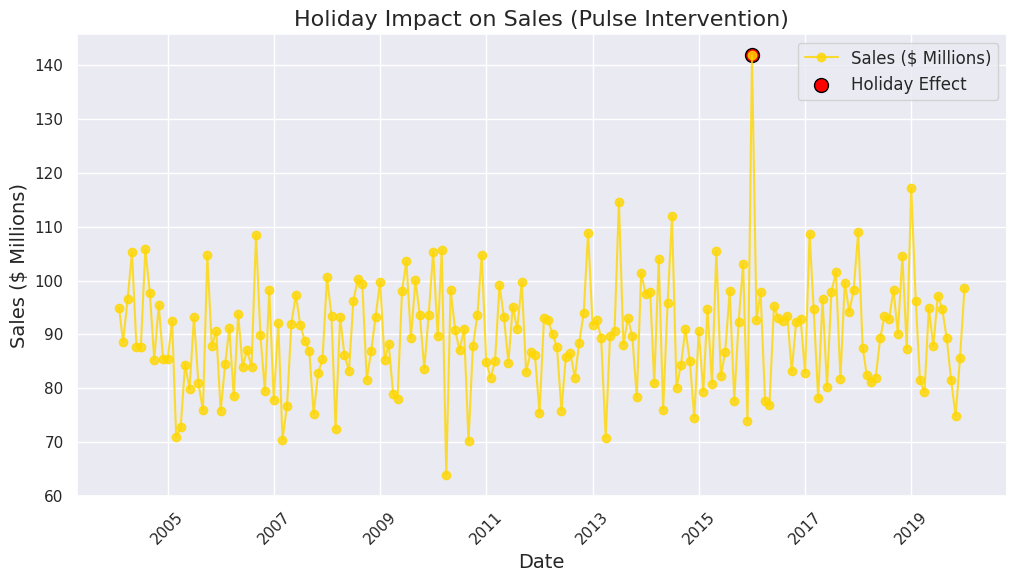

In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="darkgrid")


dates = pd.date_range(start="2005-01-01", end="2021-01-01", freq='M')


np.random.seed(42)
sales = np.random.normal(loc=90, scale=10, size=len(dates)) 


holiday_index = np.where((dates.year == 2016) & (dates.month == 12))[0][0]
sales[holiday_index] += 50 


holiday_variable = np.zeros(len(dates))
holiday_variable[holiday_index] = 1  


plt.figure(figsize=(12, 6))
plt.plot(dates, sales, marker='o', linestyle='-', color='gold', alpha=0.8, label="Sales ($ Millions)")


plt.scatter(dates[holiday_index], sales[holiday_index], color='red', s=100, label="Holiday Effect", edgecolors='black')


plt.title("Holiday Impact on Sales (Pulse Intervention)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Sales ($ Millions)", fontsize=14)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.show()


23:11:16 - cmdstanpy - INFO - Chain [1] start processing


23:11:16 - cmdstanpy - INFO - Chain [1] done processing


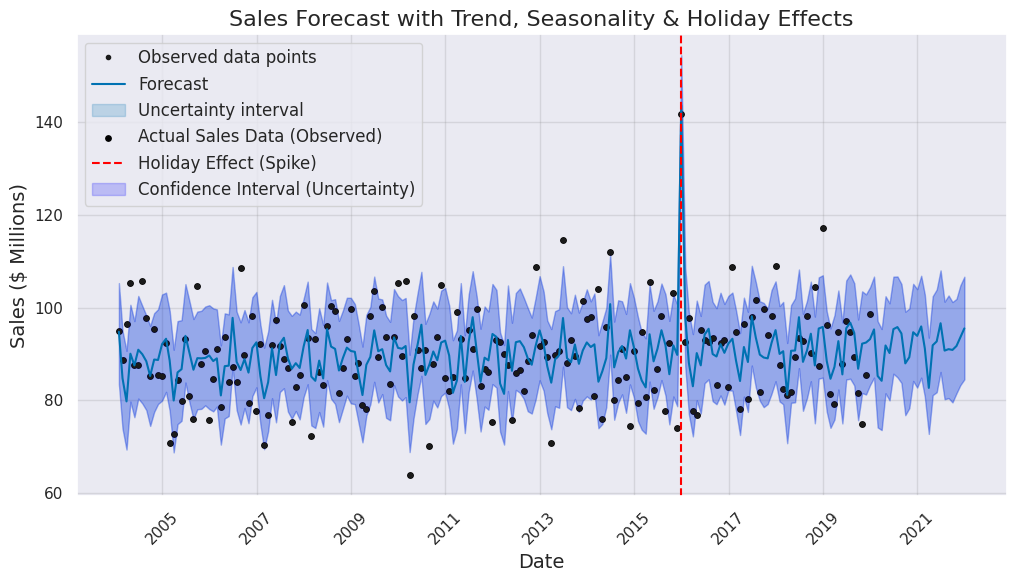

In [ ]:


from prophet import Prophet


df = pd.DataFrame({"ds": dates, "y": sales})


holidays = pd.DataFrame({
    'holiday': 'special_event',
    'ds': [dates[holiday_index]],  
    'lower_window': 0,
    'upper_window': 1,
})


model = Prophet(holidays=holidays, yearly_seasonality=True, weekly_seasonality=True)
model.fit(df)


future = model.make_future_dataframe(periods=24, freq='M') 
forecast = model.predict(future)


fig, ax = plt.subplots(figsize=(12, 6))
model.plot(forecast, ax=ax)


ax.scatter(df["ds"], df["y"], color="black", label="Actual Sales Data (Observed)", s=15)  
ax.axvline(dates[holiday_index], color="red", linestyle="--", label="Holiday Effect (Spike)")  
ax.fill_between(forecast["ds"], forecast["yhat_lower"], forecast["yhat_upper"], 
                color="blue", alpha=0.2, label="Confidence Interval (Uncertainty)")


ax.set_title("Sales Forecast with Trend, Seasonality & Holiday Effects", fontsize=16)
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Sales ($ Millions)", fontsize=14)
ax.legend(fontsize=12)

plt.xticks(rotation=45)
plt.show()


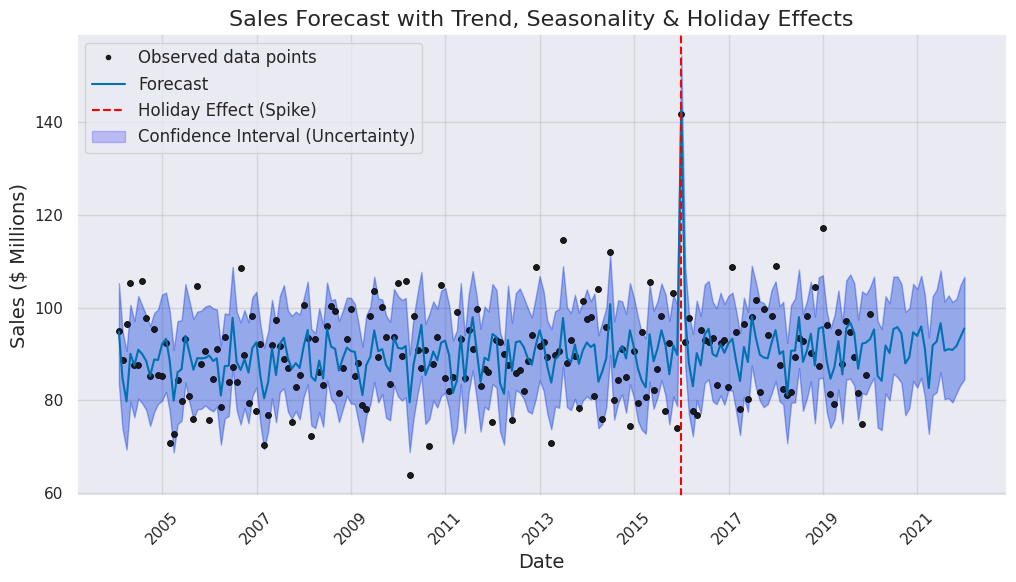

In [ ]:


fig, ax = plt.subplots(figsize=(12, 6))
model.plot(forecast, ax=ax)


ax.scatter(df["ds"], df["y"], color="black", s=15)  
ax.axvline(dates[holiday_index], color="red", linestyle="--", label="Holiday Effect (Spike)")  
ax.fill_between(forecast["ds"], forecast["yhat_lower"], forecast["yhat_upper"], 
                color="blue", alpha=0.2, label="Confidence Interval (Uncertainty)")

handles, labels = ax.get_legend_handles_labels()
filtered_handles = [handles[0], handles[1], handles[3], handles[4]]  
filtered_labels = [labels[0], labels[1], labels[3], labels[4]]

ax.legend(filtered_handles, filtered_labels, fontsize=12)


ax.set_title("Sales Forecast with Trend, Seasonality & Holiday Effects", fontsize=16)
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Sales ($ Millions)", fontsize=14)

plt.xticks(rotation=45)
plt.show()
